# Etapas

- Importação da Base de Dados
- Tratamento dos Dados
- Cálculos
- Envio dos e-mails

In [1]:
# Importando bibliotecas e Base de Dados
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

df_vendas = pd.read_excel('vendas.xlsx')

## Funções

In [2]:
def gerar_grafico(dataframe, y_labels, y_lim, title, color='tab:blue', figsize=(20,5)):
    """
    Função para configurar a geração dos gráficos

    Parameters:
    dataframe: Object DataFrame armazenando o dataframe que baseará o gráfico
    y_labels: lista com rótulos para os valores do eixo y
    y_lim: tupla com valor mínimo e máximo do eixo y
    title: string armazenando o título do gráfico
    color: string que definirá a cor das barras
    figsize: tupla com o tamanho da área que o gráfico será plotado
    """
    warnings.filterwarnings('ignore', category=UserWarning)

    fig, ax = plt.subplots(figsize=figsize)
    dataframe.plot.bar(rot=80, title=title, ax=ax, color=color)
    ax.set_ylim(y_lim)
    ax.set_yticklabels([f'{val:,.0f}' for val in y_labels])

def anexar_arquivo(msg, anexo, nome_arquivo):
    """
    Adiciona anexos ao corpo do e-mail

    Parameters:
    msg: Object MIMEMultipart armazenando a mensagem do e-mail
    anexo: aponta para o local do arquivo a ser anexado
    nome_arquivo: atribui nome ao arquivo anexado
    """

    attachment = open(anexo, 'rb')
    att = MIMEBase('application', 'octet-stream')
    att.set_payload(attachment.read())
    encoders.encode_base64(att)
    att.add_header('Content-Disposition', f'attachment; filename={nome_arquivo}')
    attachment.close()
    msg.attach(att)

def enviar_email(corpo_email, anexos):
    """
    Envia um e-mail automaticamente via gmail SMTP 

    Parameters:
    corpo_email: armazena o texto do corpo do e-mail em HTML
    anexos: lista com os anexos a serem enviados
    """

    # mensagem multipart para enviar html e anexos no e-mail
    msg = MIMEMultipart()
    msg['Subject'] = 'Relatório Semanal'
    msg['From'] = 'lucasmdantas9@gmail.com'
    msg['To'] = 'lucasmdantas9@gmail.com'

    # adicionando texto html ao mime
    corpo_email_part = MIMEText(corpo_email, 'html')
    msg.attach(corpo_email_part)

    # adicionando anexos
    if anexos:
        for anexo in anexos:
            nome_arquivo = anexo[2:]
            anexar_arquivo(msg, anexo, nome_arquivo)

    password = 'abst onsd elym efdz'
    s = smtplib.SMTP('smtp.gmail.com: 587')
    s.starttls()
    s.login(msg['From'], password)
    s.sendmail(msg['From'], [msg['To']], msg.as_string().encode('utf-8'))
    print('***************EMAIL ENVIADO*****************')


In [3]:
df_vendas.head(5)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71


## Tratamento dos Dados

In [4]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100999 entries, 0 to 100998
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Código Venda    100999 non-null  int64         
 1   Data            100999 non-null  datetime64[ns]
 2   ID Loja         100999 non-null  object        
 3   Produto         100999 non-null  object        
 4   Quantidade      100999 non-null  int64         
 5   Valor Unitário  100999 non-null  int64         
 6   Valor Final     100999 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.4+ MB


##### Removendo Colunas Desnecessárias e Renomeando

In [5]:
nomes_colunas = {
    'Código Venda':'ID_VENDA',
    'Data':'DATA',
    'ID Loja':'ID_LOJA',
    'Produto':'PRODUTO',
    'Quantidade':'QTD',
    'Valor Unitário':'VLR_UNIT',
    'Valor Final':'VLR_FINAL'
}
df_vendas.rename(columns=nomes_colunas, inplace=True)
df_vendas.drop(columns=['DATA', 'ID_VENDA'], inplace=True)
df_vendas.head(5)

,ID_LOJA,PRODUTO,QTD,VLR_UNIT,VLR_FINAL
0,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,Iguatemi Esplanada,Camiseta,2,180,360
2,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,Norte Shopping,Relógio,3,200,600
4,Norte Shopping,Chinelo Liso,1,71,71


## Cálculos

### Faturamento por Loja

In [6]:
faturamento_lojas = df_vendas[['ID_LOJA', 'VLR_FINAL']].groupby('ID_LOJA').sum()
faturamento_lojas.head(3)

,VLR_FINAL
ID_LOJA,
Bourbon Shopping SP,1726110
Center Shopping Uberlândia,1668921
Iguatemi Campinas,1762419


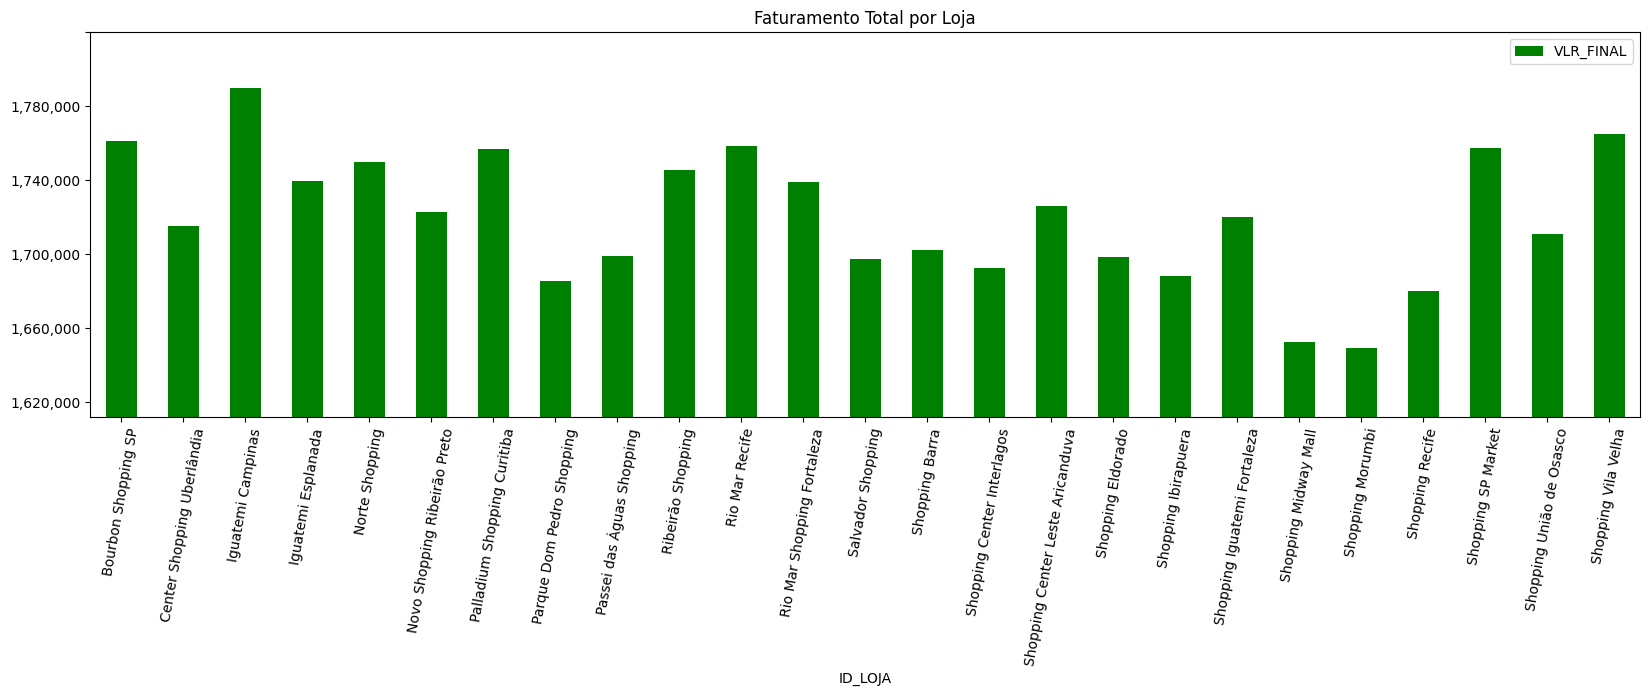

Loja com o Maior Faturamento: Iguatemi Campinas - R$ 1,762,419.00
Loja com o Menor Faturamento: Shopping Morumbi - R$ 1,586,444.00


In [7]:
y_labels = [1580000, 1620000, 1660000, 1700000, 1740000, 1780000]
gerar_grafico(faturamento_lojas, y_labels, (1540000, 1800000), 'Faturamento Total por Loja', 'green')
plt.savefig('faturamento_lojas.png', bbox_inches='tight', pad_inches=0.3)
plt.show()
plt.close()

# Maior e Menor faturamento
graf_faturamento_lojas = faturamento_lojas.reset_index()
indice = graf_faturamento_lojas['VLR_FINAL'].idxmax()
id_maior_fat = graf_faturamento_lojas.at[indice, 'ID_LOJA']
maior_fat = max(graf_faturamento_lojas['VLR_FINAL'])
print(f'Loja com o Maior Faturamento: {id_maior_fat} - R$ {maior_fat:,.2f}')

indice = graf_faturamento_lojas['VLR_FINAL'].idxmin()
id_menor_fat = graf_faturamento_lojas.at[indice, 'ID_LOJA']
menor_fat = min(graf_faturamento_lojas['VLR_FINAL'])
print(f'Loja com o Menor Faturamento: {id_menor_fat} - R$ {menor_fat:,.2f}')

## Quantidade de Produtos Vendidos por Loja

In [8]:
vendas_lojas = df_vendas[ ['ID_LOJA', 'QTD'] ].groupby('ID_LOJA').sum()
display(vendas_lojas)

,QTD
ID_LOJA,
Bourbon Shopping SP,8863
Center Shopping Uberlândia,8627
Iguatemi Campinas,8935
Iguatemi Esplanada,8580
Norte Shopping,9014
Novo Shopping Ribeirão Preto,8751
Palladium Shopping Curitiba,9091
Parque Dom Pedro Shopping,8388
Passei das Águas Shopping,8618


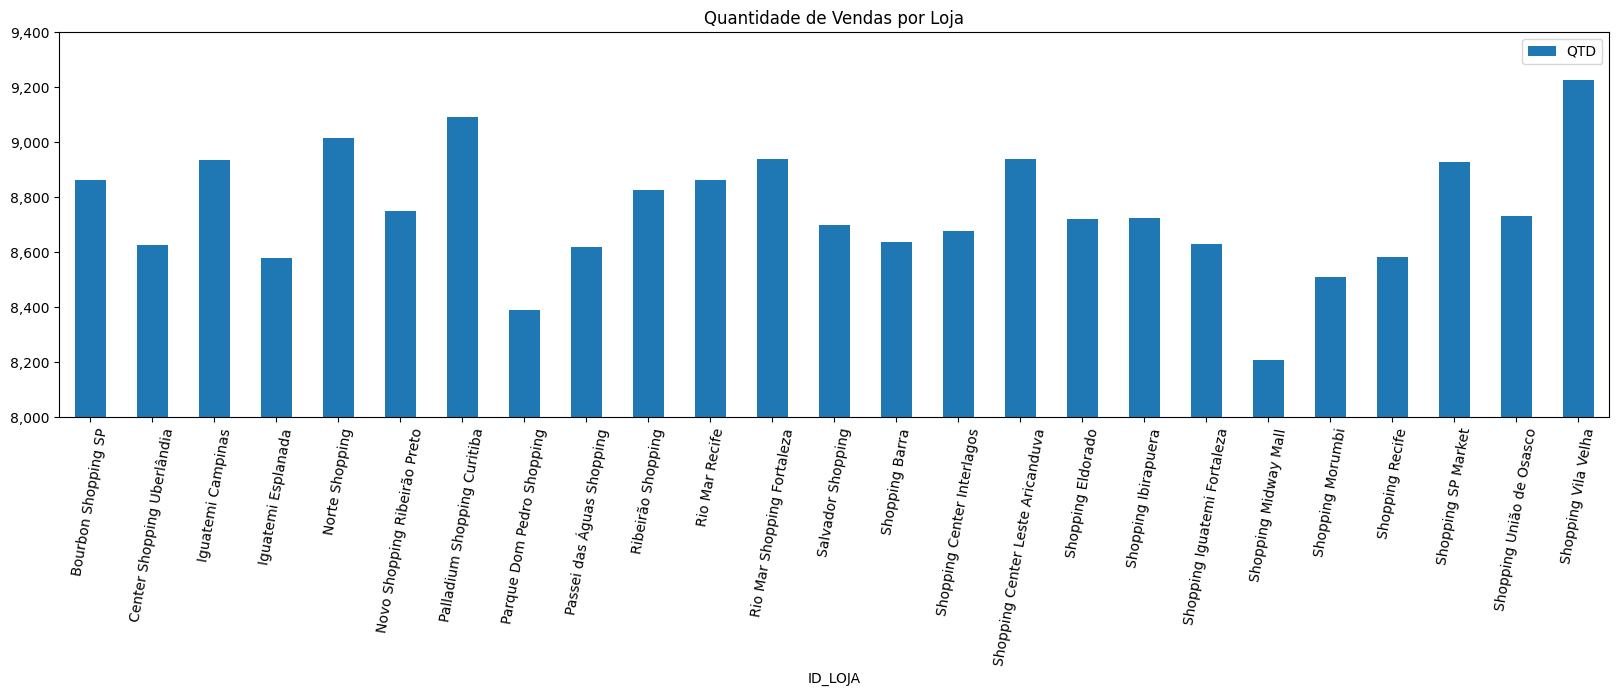

Loja com Maior Quantidade de Vendas: Shopping Vila Velha - 9224 vendas
Loja com Menor Quantidade de Vendas: Shopping Midway Mall - 8206 vendas


In [9]:
y_labels = [8000, 8200, 8400, 8600, 8800, 9000, 9200, 9400]
gerar_grafico(vendas_lojas, y_labels, (8000, 9400), 'Quantidade de Vendas por Loja')
plt.savefig('qtd_lojas.png', bbox_inches='tight', pad_inches=0.3)
plt.show()

## Maior e Menor Quantidades
graf_vendas_lojas = vendas_lojas.reset_index()

indice = graf_vendas_lojas['QTD'].idxmax()
id_maior_qtd = graf_vendas_lojas.at[indice, 'ID_LOJA']
maior_qtd = max(graf_vendas_lojas['QTD'])
print(f'Loja com Maior Quantidade de Vendas: {id_maior_qtd} - {maior_qtd:.0f} vendas')

indice = graf_vendas_lojas['QTD'].idxmin()
id_menor_qtd = graf_vendas_lojas.at[indice, 'ID_LOJA']
menor_qtd = min(graf_vendas_lojas['QTD'])
print(f'Loja com Menor Quantidade de Vendas: {id_menor_qtd} - {menor_qtd:.0f} vendas')

## Ticket Médio

                                  TICKET_MEDIO
ID_LOJA                                       
Bourbon Shopping SP                 194.754598
Center Shopping Uberlândia          193.453228
Iguatemi Campinas                   197.248909
Iguatemi Esplanada                  198.098019
Norte Shopping                      189.923231
Novo Shopping Ribeirão Preto        191.775226
Palladium Shopping Curitiba         189.321307
Parque Dom Pedro Shopping           194.519552
Passei das Águas Shopping           191.345324
Ribeirão Shopping                   193.441586
Rio Mar Recife                      194.377299
Rio Mar Shopping Fortaleza          190.044758
Salvador Shopping                   189.323868
Shopping Barra                      191.375666
Shopping Center Interlagos          189.105014
Shopping Center Leste Aricanduva    188.282614
Shopping Eldorado                   189.025232
Shopping Ibirapuera                 187.442394
Shopping Iguatemi Fortaleza         194.092479
Shopping Midw

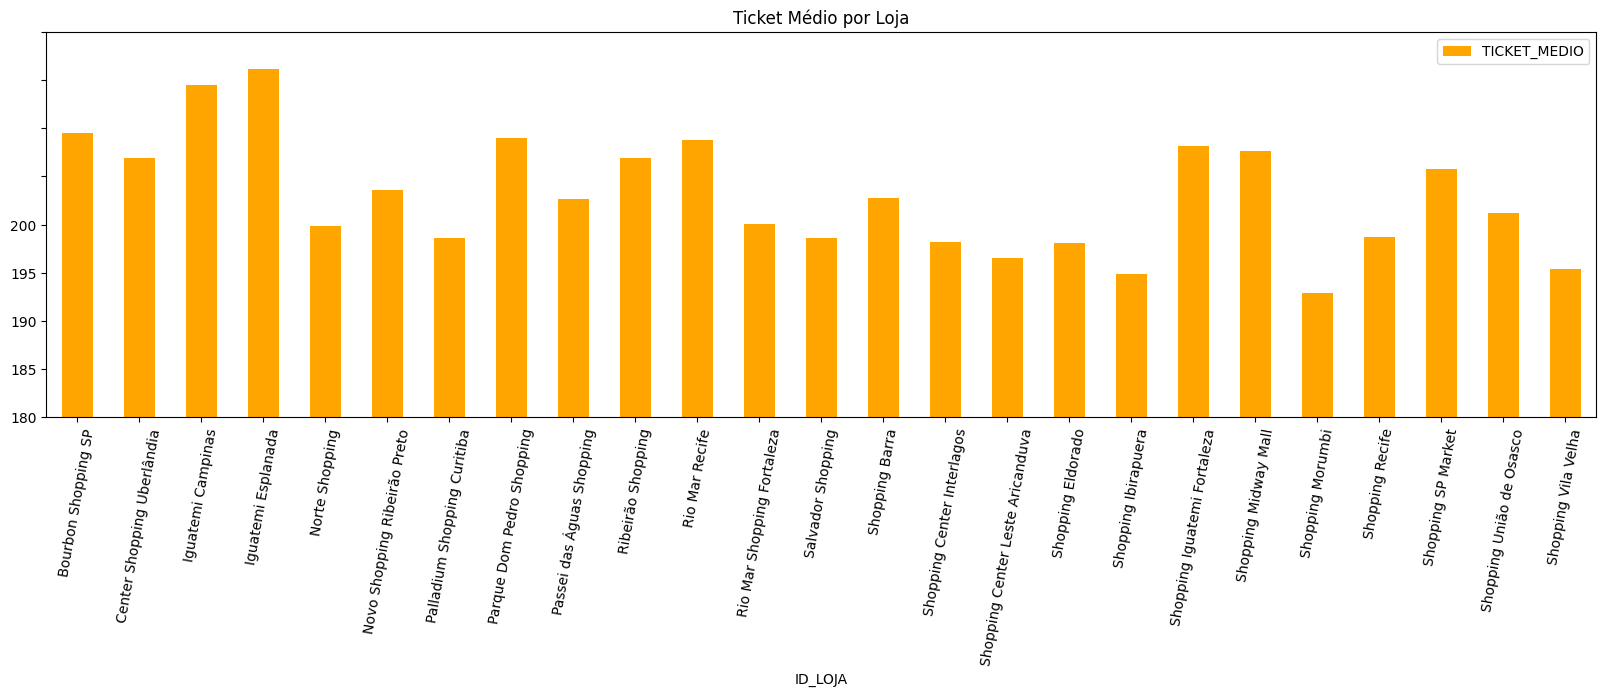

Loja com Maior Ticket Médio: Iguatemi Esplanada - R$ 198.10
Loja com Menor Ticket Médio: Shopping Morumbi - R$ 186.46


In [10]:
# ticket medio = faturamento / qtd
ticket_medio = (faturamento_lojas['VLR_FINAL'] / vendas_lojas['QTD']).to_frame()
ticket_medio = ticket_medio.rename(columns={0:'TICKET_MEDIO'})
print(ticket_medio)

y_labels = [180, 185, 190, 195, 200]
gerar_grafico(ticket_medio, y_labels, (180, 200), 'Ticket Médio por Loja', color='orange')
plt.savefig('ticket_lojas.png', bbox_inches='tight', pad_inches=0.3)
plt.show()

# Maior e Menor Quantidades
graf_ticket_medio = ticket_medio.reset_index()

indice = graf_ticket_medio['TICKET_MEDIO'].idxmax()
id_maior_ticket = graf_ticket_medio.at[indice, 'ID_LOJA']
maior_ticket = max(graf_ticket_medio['TICKET_MEDIO'])
print(f'Loja com Maior Ticket Médio: {id_maior_ticket} - R$ {maior_ticket:.2f}')

indice = graf_ticket_medio['TICKET_MEDIO'].idxmin()
id_menor_ticket = graf_ticket_medio.at[indice, 'ID_LOJA']
menor_ticket = min(graf_ticket_medio['TICKET_MEDIO'])
print(f'Loja com Menor Ticket Médio: {id_menor_ticket} - R$ {menor_ticket:.2f}')

## Enviar E-mail para a Diretoria

In [11]:
corpo_email_diretoria = f"""
<p>Boa tarde prezados(as)!</p>
<p>Segue o Relatório de Faturamento, Vendas em Quantidade e Ticket Médio de cada unidade (gráficos completos vão em anexo): </p>
<p><b>Faturamento por Loja</b></p>
<ul>
    <li>Loja com o Maior Faturamento: {id_maior_fat} - R$ {maior_fat:,.2f}</li>
    <li>Loja com o Menor Faturamento: {id_menor_fat} - R$ {menor_fat:,.2f}</li>
</ul>
<p><b>Vendas em Quantidade por Loja</b></p>
<ul>
    <li>Loja com o Maior Número de Vendas: {id_maior_qtd} - {maior_qtd:.0f}</li>
    <li>Loja com o Menor Número de Vendas: {id_menor_qtd} - {menor_qtd:.0f}</li>
</ul>
<p><b>Ticket Médio por Loja</b></p>
<ul>
    <li>Loja com o Maior Ticket Médio: {id_maior_ticket} - R$ {maior_ticket:,.2f}</li>
    <li>Loja com o Menor Ticket Médio: {id_menor_ticket} - R$ {menor_ticket:,.2f}</li>
</ul>
"""

anexos_diretoria = ['./faturamento_lojas.png',
                    './qtd_lojas.png',
                    './ticket_lojas.png']

enviar_email(corpo_email_diretoria, anexos_diretoria)


***************EMAIL ENVIADO*****************


## Relatórios Gerentes

In [12]:
df_gerentes = df_vendas[['ID_LOJA', 'QTD', 'VLR_UNIT', 'VLR_FINAL']].groupby('ID_LOJA').sum()
display(df_gerentes.reset_index())

,ID_LOJA,QTD,VLR_UNIT,VLR_FINAL
0,Bourbon Shopping SP,8863,791748,1726110
1,Center Shopping Uberlândia,8627,774418,1668921
2,Iguatemi Campinas,8935,796153,1762419
3,Iguatemi Esplanada,8580,775886,1699681
4,Norte Shopping,9014,798860,1711968
5,Novo Shopping Ribeirão Preto,8751,773200,1678225
6,Palladium Shopping Curitiba,9091,796103,1721120
7,Parque Dom Pedro Shopping,8388,762457,1631630
8,Passei das Águas Shopping,8618,768205,1649014
9,Ribeirão Shopping,8825,786547,1707122


In [13]:
df_gerentes['EMAIL'] = [f'gerente{i}@email.com' for i in df_gerentes.reset_index().index]

display(df_gerentes.reset_index())

,ID_LOJA,QTD,VLR_UNIT,VLR_FINAL,EMAIL
0,Bourbon Shopping SP,8863,791748,1726110,gerente0@email.com
1,Center Shopping Uberlândia,8627,774418,1668921,gerente1@email.com
2,Iguatemi Campinas,8935,796153,1762419,gerente2@email.com
3,Iguatemi Esplanada,8580,775886,1699681,gerente3@email.com
4,Norte Shopping,9014,798860,1711968,gerente4@email.com
5,Novo Shopping Ribeirão Preto,8751,773200,1678225,gerente5@email.com
6,Palladium Shopping Curitiba,9091,796103,1721120,gerente6@email.com
7,Parque Dom Pedro Shopping,8388,762457,1631630,gerente7@email.com
8,Passei das Águas Shopping,8618,768205,1649014,gerente8@email.com
9,Ribeirão Shopping,8825,786547,1707122,gerente9@email.com


## Criando Relatório de Venda de Produtos de Cada Loja

In [14]:
df_vendas

,ID_LOJA,PRODUTO,QTD,VLR_UNIT,VLR_FINAL
0,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,Iguatemi Esplanada,Camiseta,2,180,360
2,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,Norte Shopping,Relógio,3,200,600
4,Norte Shopping,Chinelo Liso,1,71,71
...,...,...,...,...,...
100994,Center Shopping Uberlândia,Short Listrado,2,102,204
100995,Center Shopping Uberlândia,Mochila,4,270,1080
100996,Center Shopping Uberlândia,Pulseira Estampa,1,87,87
100997,Ribeirão Shopping,Camisa Listrado,1,108,108


In [15]:
lojas = df_vendas['ID_LOJA'].unique()
print(lojas)

['Iguatemi Esplanada' 'Norte Shopping' 'Rio Mar Shopping Fortaleza'
 'Shopping Barra' 'Shopping Ibirapuera' 'Iguatemi Campinas'
 'Shopping Center Leste Aricanduva' 'Passei das Águas Shopping'
 'Shopping Recife' 'Shopping Midway Mall' 'Bourbon Shopping SP'
 'Shopping Center Interlagos' 'Parque Dom Pedro Shopping'
 'Center Shopping Uberlândia' 'Shopping União de Osasco'
 'Shopping Eldorado' 'Shopping Vila Velha' 'Novo Shopping Ribeirão Preto'
 'Rio Mar Recife' 'Palladium Shopping Curitiba' 'Shopping SP Market'
 'Ribeirão Shopping' 'Shopping Iguatemi Fortaleza' 'Shopping Morumbi'
 'Salvador Shopping']


In [16]:
import os

for loja in lojas:
    pasta = f'./lojas/{loja}'
    os.mkdir(pasta)
    produtos_loja = df_vendas[ df_vendas['ID_LOJA'] == loja]
    produtos_loja = produtos_loja[['PRODUTO', 'QTD', 'VLR_FINAL']].groupby('PRODUTO').sum().sort_values(by='QTD', ascending=False)

    top_10_qtd = produtos_loja['QTD']
    top_10_qtd = top_10_qtd[:10]
    y_labels = top_10_qtd.values[::-1]
    y_lim = (top_10_qtd.iloc[9], top_10_qtd.iloc[0])
    gerar_grafico(top_10_qtd, y_labels, y_lim, f'Top 10 Produtos (QUANTIDADE) - Loja {loja}', color='purple')
    plt.savefig(f'{pasta}/top_10_qtd.png', bbox_inches='tight', pad_inches=0.3)
    plt.close()

    top_10_faturamento = produtos_loja['VLR_FINAL'].sort_values(ascending=False)
    top_10_faturamento = top_10_faturamento[:10]
    y_labels = top_10_faturamento.values[::-1]
    y_lim = (top_10_faturamento.iloc[9], top_10_faturamento.iloc[0])
    gerar_grafico(top_10_faturamento, y_labels, y_lim, f'Top 10 Produtos (FATURAMENTO) - Loja {loja}', color='brown', figsize=(20,8))
    plt.savefig(f'{pasta}/top_10_faturamento.png', bbox_inches='tight', pad_inches=0.3)
    plt.close()
